In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import random
from pandas import DataFrame
from datetime import datetime
import keras
from keras import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten, Reshape, Activation
from keras.layers import Conv1D, MaxPooling1D ,AveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras import backend as K
#from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
#from tensorflow.keras.optimizers import Adam

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4589517860581340528
xla_global_id: -1
]


In [3]:
def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]
print(get_available_devices()) 

['/device:CPU:0']


In [4]:
import pandas as pd
train_data = pd.read_csv('/data/yingfei/cancer_data/train_data.csv')
test_data = pd.read_csv('/data/yingfei/cancer_data/test_data.csv')

In [5]:
print(f'Train Shape: {train_data.shape}')
print(f'Test Shape: {test_data.shape}')

Train Shape: (239855, 2652)
Test Shape: (26565, 2652)


In [6]:
train_data = train_data.loc[train_data['auc'] >= 0]

In [7]:
train_data = train_data.reset_index(drop = True)
train_data

,ARXSPAN_ID,DRUG_NAME,ABL1,ACVR1B,AKT1,AKT2,AKT3,ALK,ALOX12B,FAM123B,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,auc
0,ACH-000001,JW-7-24-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.778432
1,ACH-000001,KIN001-260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.951321
2,ACH-000001,NSC-87877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.840287
3,ACH-000001,PLX-4720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.936410
4,ACH-000001,ERK5-IN-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.891908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203913,ACH-001716,KIN001-236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.956865
203914,ACH-001716,LUMINESPIB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.975168
203915,ACH-001716,NUTLIN-3A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.871995
203916,ACH-001716,SGC0946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.975417


In [8]:
test_data = test_data.loc[test_data['auc'] >= 0]

In [9]:
test_data = test_data.reset_index(drop = True)
test_data

,ARXSPAN_ID,DRUG_NAME,ABL1,ACVR1B,AKT1,AKT2,AKT3,ALK,ALOX12B,FAM123B,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,auc
0,ACH-000802,JW-7-24-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.528562
1,ACH-000802,KIN001-260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.930958
2,ACH-000802,NSC-87877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.759249
3,ACH-000802,PLX-4720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.936510
4,ACH-000802,ERK5-IN-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.823453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22873,ACH-000438,KIN001-266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.975578
22874,ACH-000438,LUMINESPIB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.980529
22875,ACH-000438,NUTLIN-3A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.960501
22876,ACH-000438,SGC0946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.970524


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
padel_features = train_data[train_data.columns[-2326:-1]]
padel_features = scaler.fit_transform(padel_features)
padel_features = pd.DataFrame(padel_features)
#train_features = train_data.drop(columns = ['ARXSPAN_ID', 'DRUG_NAME','auc'])
#train_features = scaler.fit_transform(train_features)
train_features = train_data[train_data.columns[2:-2326]]
train_features = pd.concat([train_features, padel_features], axis = 1)
train_features = train_features.to_numpy()
train_features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
train_label = train_data['auc']
print(f'Minimum train y value: {min(train_label)}, \
      Maximum train y value: {max(train_label)}')

Minimum train y value: 0.004496,       Maximum train y value: 0.999883


In [12]:
padel_features = test_data[test_data.columns[-2326:-1]]
padel_features = scaler.fit_transform(padel_features)
padel_features = pd.DataFrame(padel_features)
#test_features = test_data.drop(columns = ['ARXSPAN_ID', 'DRUG_NAME','auc'])
#test_features = scaler.transform(test_features)
test_features = test_data[test_data.columns[2:-2326]]
test_features = pd.concat([test_features, padel_features], axis = 1)
test_features = test_features.to_numpy()
test_features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
test_label = test_data['auc']
print(f'Minimum test y value: {min(test_label)}, \
      Maximum test y value: {max(test_label)}')

Minimum test y value: 0.013524,       Maximum test y value: 0.998284


In [14]:
train_X, train_y, test_X, test_y = train_features, train_label, test_features, test_label

In [15]:
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], 1)
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], 1)

In [16]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(203918, 2649, 1) (203918,) (22878, 2649, 1) (22878,)


In [17]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
print('train_X shape:', train_X.shape)
print(train_X.shape[0], 'train samples')
print(test_X.shape[0], 'test samples')

train_X shape: (203918, 2649, 1)
203918 train samples
22878 test samples


In [18]:
train_X = np.nan_to_num(train_X)
train_y = np.nan_to_num(train_y)
test_X = np.nan_to_num(test_X)
test_y = np.nan_to_num(test_y)

In [19]:
from bayes_opt import BayesianOptimization, UtilityFunction

In [20]:
from sklearn.model_selection import train_test_split

In [ ]:
### split into train and validation set
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, random_state = 42)

In [ ]:
### Hyperparameters set
params_lst = ["learning_rate", "batch_size", "optimizer"]
params_value_dict = {"learning_rate": [1e-4, 2e-4, 5e-4], 
                     "batch_size": [80, 100, 120], 
                     "optimizer": ['sgd', 'adam']}
import itertools as it

allparams = params_value_dict
combinations = it.product(*(params_value_dict[param] for param in allparams))
combinations_lst = list(combinations)
print(len(combinations_lst))

hyper_param_dict = {}
for i in range(len(combinations_lst)):
    hyper_param_dict[i] = {}
    for j in range(len(params_lst)):
        hyper_param_dict[i][params_lst[j]] = combinations_lst[i][j]

In [ ]:
import json
from keras.models import model_from_json, load_model
workdir = "resnet_ht_models"

model_eval_dict = {}
model_dict = {}
training_epochs = 10
model_ht_history = {}

for i in hyper_param_dict:
    params_dict = hyper_param_dict[i]
    learning_rate=params_dict["learning_rate"] 
    batch_size=params_dict["batch_size"] 
    opt_name=params_dict["optimizer"]
    
    # hyper parameters
    num_classes = 1
    if opt_name == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate)
    else: # sgd
        optimizer = keras.optimizers.SGD(learning_rate)
    
    with K.tf.device('/GPU:0'): # model compile
        inputs = Input(shape=(train_X.shape[1],1),name='inputs')

        x = Conv1D(16, kernel_size=3, strides=2, padding="same")(inputs)
        x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
    #     y = x
        x = Activation('tanh')(x)

        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)

        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)


        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)


        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)

        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)


        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)

        x = Conv1D(32, kernel_size=3, strides=2, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
    #     x = BatchNormalization()(x)

        x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)


        x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)

        x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)

        x = Conv1D(64, kernel_size=3, strides=2, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
    #     x = BatchNormalization()(x)

        x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)


        x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)

        x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)

    #     x = AveragePooling1D(pool_size=8)(x)
        x = Flatten()(x)
        x = Dense(units=2048, name='dense1'  ) (x)
        x = BatchNormalization()(x)
        x = Dropout(0.1, name='dropout1') (x)
        x = Activation('relu')(x)

    #    x = Reshape((300,1))(x)

    #    x = Conv1D(30, kernel_size=150, strides=1, activation = 'relu')(x)
    #    x = MaxPooling1D(pool_size=2)(x)
    #    x = BatchNormalization()(x)

        x = Dense(units=1024, name='dense5'  ) (x)
        x = BatchNormalization()(x)
        y = x
        x = Dropout(0.1, name='dropout5') (x)
        x = Activation('relu')(x)

        x = Dense(units=512, name='dense6'  ) (x)
        x = BatchNormalization()(x)
        x = Dropout(0.1, name='dropout6') (x)
        x = Activation('relu')(x)

        x = Dense(units=1024, name='dense7'  ) (x)
        x = BatchNormalization()(x)
        x = Dropout(0.1, name='dropout7') (x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)

        x = Dense(units=512, name='dense8'  ) (x)
        x = BatchNormalization()(x)
        x = Dropout(0.1, name='dropout8') (x)
        x = Activation('relu')(x)

        x = Dense(units=256, name='dense9'  ) (x)
        x = BatchNormalization()(x)
        x = Dropout(0.1, name='dropout9') (x)
        x = Activation('relu')(x)

        x = Dense(units=128, name='dense10'  ) (x)
        x = BatchNormalization()(x)
        y = x
        x = Dropout(0.1, name='dropout10') (x)
        x = Activation('relu')(x)


        predictions = Dense(1, activation='linear', name='predictions', kernel_initializer='he_normal')(x)

        model = Model(inputs=inputs, outputs=predictions, name='Test_v2_DNN')
        model.compile(loss=keras.losses.mean_squared_error,
                      optimizer=optimizer,
                      metrics=['mse','mae'])
        
        # model training
        StartTime8 = datetime.now()
        print("StartTime :", StartTime8)
        with K.tf.device('/GPU:0'):
            model_train = model.fit(train_X, train_y, batch_size=batch_size,epochs=training_epochs,verbose=1,
                                validation_data=(val_X, val_y))

        EndTime8 = datetime.now()
        print("EndTime :", EndTime8)
    model.save_weights(workdir+ f'/model_{i}_new.h5')
    with open(workdir + f'/model_architecture_{i}_new.json', 'w') as f:
        f.write(model.to_json())
        
    # evaluation
    print(f"Evaluating model {i}...")
    test_score = model.evaluate(test_X, test_y, verbose=1)
    model_ht_history[(learning_rate, batch_size)] = model
    loss, mse, mae = test_score
    print("loss=%.6f, mse=%.6f, mae=%.6f"%(loss, mse, mae))
    
    model_dict[i] = model
    model_eval_dict[i] = {"loss":loss, "mse":mse, "mae":mae}

In [ ]:
min_mse = 10
bst_model_id_lst = []
for i in model_eval_dict:
    if model_eval_dict[i]['mse'] < min_mse:
        bst_model_id_lst = []
        bst_model_id_lst.append(i)
        min_mse = model_eval_dict[i]['mse']
    elif model_eval_dict[i]['mse'] == min_mse:
        bst_model_id_lst.append(i)

In [ ]:
bst_model_id_lst

In [ ]:
model_eval_dict[3]

In [ ]:
hyper_param_dict[3]

In [ ]:
best_model = model_dict[3]

In [ ]:
model_ht_history[(0.0001, 100)] is best_model

In [21]:
import json
from keras.models import model_from_json, load_model
workdir = "resnet_ht_models"

json_file = open(workdir +'/model_architecture_3_new.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(workdir +"/model_3_new.h5")

In [22]:
best_model = loaded_model

In [24]:
best_model.compile(loss=keras.losses.mean_squared_error,
                  optimizer=tf.keras.optimizers.Adam(0.0001),
                  metrics=['mse','mae'])

In [25]:
test_eval = best_model.evaluate(test_X, test_y, verbose=1)

715/715 [==============================] - 60s 67ms/step - loss: 0.0172 - mse: 0.0172 - mae: 0.0808


In [ ]:
test_eval

In [ ]:
model_train = best_model.fit(train_X, train_y, batch_size=batch_size,epochs=training_epochs,verbose=1,
                                validation_data=(val_X, val_y))

In [ ]:
best_model.summary()

In [ ]:
# mse and loss monitor

accuracy = model_train.history['mse']
val_accuracy = model_train.history['val_mse']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']

np_acc = np.array(accuracy)
np_val_acc = np.array(val_accuracy)
np_loss = np.array(loss)
np_val_loss = np.array(val_loss)

In [33]:
import matplotlib
from matplotlib import pyplot as plt

In [ ]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training mse')
plt.plot(epochs, val_accuracy, 'b', label='Validation mse')
plt.title('Training and validation mse')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig(workdir + '//mse_loss_plot.png')
plt.show()

In [27]:
# test validation
predicted_classes = best_model.predict(test_X)

715/715 [==============================] - 45s 55ms/step


In [28]:
predicted_value = predicted_classes

In [29]:
a = pd.DataFrame(predicted_value)
b = pd.DataFrame(test_y)
c = pd.concat([a,b], axis=1)
c.columns=["Predicted","Test"]

In [ ]:
# c.to_csv(workdir + '/DeepAUCv2_epoch_10_ht_result_new.csv')

In [30]:
c

,Predicted,Test
0,0.654048,0.528562
1,0.893152,0.930958
2,0.821123,0.759249
3,0.929911,0.936510
4,0.766687,0.823453
...,...,...
22873,0.778164,0.975578
22874,0.966873,0.980529
22875,0.925721,0.960501
22876,0.950170,0.970524


In [31]:
predicted_value.shape

(22878, 1)

Text(0, 0.5, 'predicted_AUC_value')

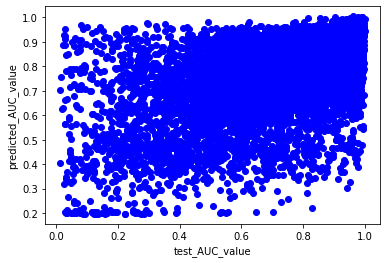

In [34]:
# scatter plot as test validation
plt.scatter(test_y,predicted_value,c='blue')
plt.xlabel('test_AUC_value')
plt.ylabel('predicted_AUC_value')
# plt.savefig(workdir + '/DeepAUCv2_epoch_10_ht_test_scatterplot_new.png')

In [35]:
# calculate RMSE

rse = ((b[0]-a[0])**2).sum()
mse = rse / len(b)
print("Final rmse value is =",np.sqrt(mse))

Final rmse value is = 0.13101105996904397


In [36]:
mae = (np.abs(b[0]-a[0])).sum()
mae / len(b)

0.0807601877950231

In [37]:
mse

0.017163897834212436

In [38]:
# R-squared value

from sklearn.metrics import r2_score
r2_value = r2_score(b, a) 
print(r2_value)

0.4896514011395332


In [39]:
full_test = pd.read_csv('/data/yingfei/cancer_data/test_data.csv')

In [40]:
full_test = full_test[['ARXSPAN_ID', 'DRUG_NAME']]

In [41]:
eval_data = test_data[['ARXSPAN_ID', 'DRUG_NAME', 'auc']].copy()
eval_data['pred_auc'] = predicted_value
eval_data

,ARXSPAN_ID,DRUG_NAME,auc,pred_auc
0,ACH-000802,JW-7-24-1,0.528562,0.654048
1,ACH-000802,KIN001-260,0.930958,0.893152
2,ACH-000802,NSC-87877,0.759249,0.821123
3,ACH-000802,PLX-4720,0.936510,0.929911
4,ACH-000802,ERK5-IN-1,0.823453,0.766687
...,...,...,...,...
22873,ACH-000438,KIN001-266,0.975578,0.778164
22874,ACH-000438,LUMINESPIB,0.980529,0.966873
22875,ACH-000438,NUTLIN-3A,0.960501,0.925721
22876,ACH-000438,SGC0946,0.970524,0.950170


In [42]:
full_test['comb'] = full_test.ARXSPAN_ID + full_test.DRUG_NAME
eval_data['comb'] = eval_data.ARXSPAN_ID + eval_data.DRUG_NAME
eval_data = pd.merge(full_test, eval_data, on = ['ARXSPAN_ID', 'DRUG_NAME'], how = 'left')

In [43]:
type(full_test.comb[0])

str

In [44]:
eval_data_arr = pd.DataFrame(eval_data.ARXSPAN_ID.unique(), columns = ['ARXSPAN_ID'])
eval_data_arr['true_auc_arr'] = [[] for _ in range(len(eval_data_arr))]
eval_data_arr['pred_auc_arr'] = [[] for _ in range(len(eval_data_arr))]
eval_data_arr

,ARXSPAN_ID,true_auc_arr,pred_auc_arr
0,ACH-000802,[],[]
1,ACH-001496,[],[]
2,ACH-000267,[],[]
3,ACH-000508,[],[]
4,ACH-001106,[],[]
...,...,...,...
64,ACH-000953,[],[]
65,ACH-000561,[],[]
66,ACH-000819,[],[]
67,ACH-000873,[],[]


In [45]:
for i in range(len(eval_data)):
    cl_id = eval_data.loc[i, 'ARXSPAN_ID']
    auc = eval_data.loc[i, 'auc']
    pred_auc =  eval_data.loc[i, 'pred_auc']
    if np.isnan(auc):
        #eval_data_arr.loc[eval_data_arr.ARXSPAN_ID == cl_id, 'true_auc_arr'].values[0].append(1)
        #eval_data_arr.loc[eval_data_arr.ARXSPAN_ID == cl_id, 'pred_auc_arr'].values[0].append(1)
        continue
    eval_data_arr.loc[eval_data_arr.ARXSPAN_ID == cl_id, 'true_auc_arr'].values[0].append(auc)
    eval_data_arr.loc[eval_data_arr.ARXSPAN_ID == cl_id, 'pred_auc_arr'].values[0].append(pred_auc)

In [46]:
eval_data_arr

,ARXSPAN_ID,true_auc_arr,pred_auc_arr
0,ACH-000802,"[0.528562, 0.930958, 0.759249, 0.93651, 0.8234...","[0.6540484, 0.8931521, 0.8211233, 0.92991114, ..."
1,ACH-001496,"[0.8600040000000001, 0.935607, 0.919367, 0.861...","[0.6613773, 0.91212654, 0.83338135, 0.9436358,..."
2,ACH-000267,"[0.730128, 0.930868, 0.761296, 0.94428, 0.7239...","[0.66509765, 0.89906913, 0.84661126, 0.7737712..."
3,ACH-000508,"[0.958722, 0.966097, 0.832343, 0.818851, 0.953...","[0.67098606, 0.9184432, 0.84713495, 0.7835381,..."
4,ACH-001106,"[0.670247, 0.845083, 0.720917, 0.705755, 0.865...","[0.6660162, 0.90642506, 0.84074193, 0.7781825,..."
...,...,...,...
64,ACH-000953,"[0.771624, 0.902238, 0.788892, 0.987629, 0.977...","[0.68019617, 0.9249798, 0.8502419, 0.78840953,..."
65,ACH-000561,"[0.806557, 0.92585, 0.747498, 0.974266, 0.7882...","[0.661443, 0.89863825, 0.82199264, 0.9395877, ..."
66,ACH-000819,"[0.8246040000000001, 0.93947, 0.778985, 0.9747...","[0.6904291, 0.92225087, 0.8540561, 0.9445915, ..."
67,ACH-000873,"[0.6613979999999999, 0.876398, 0.837356, 0.971...","[0.6837088, 0.9073928, 0.83270884, 0.9311925, ..."


In [47]:
pred_values = eval_data_arr.pred_auc_arr.apply(lambda x: np.array(x)).to_numpy()
true_values = eval_data_arr.true_auc_arr.apply(lambda x: np.array(x)).to_numpy()

In [48]:
### NDCG
from sklearn.metrics import ndcg_score
#ndcg_all = ndcg_score([p for p in pred_values],[t for t in true_values])
#ndcg_10 = ndcg_score([p for p in pred_values],[t for t in true_values], k = 10)
ndcg_all_values = []
ndcg_10_values = []
for i in range(len(pred_values)):
    pred_value = eval_data_arr['pred_auc_arr'].apply(lambda x:list(map(lambda y:1-y, x)))[i]
    true_value = eval_data_arr['true_auc_arr'].apply(lambda x:list(map(lambda y:1-y, x)))[i]
    ndcg_all_values.append(ndcg_score([pred_value],[true_value]))
    ndcg_10_values.append(ndcg_score([pred_value],[true_value], k = 10))
    
ndcg_all = np.mean(ndcg_all_values)
ndcg_10 = np.mean(ndcg_10_values)

print(ndcg_all)
print(ndcg_10)

0.9322575319255042
0.7737811930278023


In [49]:
### Recall
results = []
for top_k in [1, 2, 5, 10]:
    dict_test_cell_line_idx_perf = {}
    for cur_cell_line_idx in range(len(pred_values)):
        # step 1
        # per the ground truth
        gt_aucs = true_values[cur_cell_line_idx]
        # find the top k drugs's idx
        topk_drug_idx_gt = np.argsort(gt_aucs)[:top_k]
        # step 2
        # per the predicted scores
        pred_scores = pred_values[cur_cell_line_idx]
        assert gt_aucs.shape == pred_scores.shape
        # find the top k drugs'idx (note: here its by pred scores)
        topk_drug_idx_pred = np.argsort(pred_scores)[:top_k]
        # step 3
        # recall@k
        cur_recall_at_k = len(
            set(topk_drug_idx_pred).intersection(set(topk_drug_idx_gt))
        ) / len(set(topk_drug_idx_gt))
        dict_test_cell_line_idx_perf[cur_cell_line_idx] = cur_recall_at_k

    avg_recall_at_k = np.mean(list(dict_test_cell_line_idx_perf.values()))
    results.append((f"Recall@{top_k}", round(avg_recall_at_k, 4)))
print(results)

[('Recall@1', 0.3768), ('Recall@2', 0.3551), ('Recall@5', 0.3913), ('Recall@10', 0.4391)]


In [50]:
### AUC
results = []
for top_k in [1, 2, 5, 10]:
    dict_test_cell_line_topk_auc_sum_gt = {}
    dict_test_cell_line_topk_auc_sum_pred = {}
    for cur_cell_line_idx in range(len(pred_values)):
        # step 1
        # per the predicted scores
        pred_scores = pred_values[cur_cell_line_idx]
        # find the top k drugs'idx (note: here its by pred scores)
        topk_drug_idx_pred = np.argsort(pred_scores)[:top_k]
        # step 2
        # per the ground truth
        gt_aucs = true_values[cur_cell_line_idx]
        # find the top k predicted drugs' (per ground truth) aucs
        topk_drug_idx_gt = np.argsort(gt_aucs)[:top_k]
        dict_test_cell_line_topk_auc_sum_gt[cur_cell_line_idx] = np.mean(
            gt_aucs[topk_drug_idx_gt]
        )
        dict_test_cell_line_topk_auc_sum_pred[cur_cell_line_idx] = np.mean(
            gt_aucs[topk_drug_idx_pred]
        )

    avg_auc_topk_gt = np.mean(
        list(dict_test_cell_line_topk_auc_sum_gt.values())
    )
    avg_auc_topk_pred = np.mean(
        list(dict_test_cell_line_topk_auc_sum_pred.values())
    )

    results.append(
        (
            f"Auc@{top_k}",
            f"{round(avg_auc_topk_pred, 4)} (GT: {round(avg_auc_topk_gt, 4)})",
        )
    )

print(results)

[('Auc@1', '0.2416 (GT: 0.1198)'), ('Auc@2', '0.3153 (GT: 0.157)'), ('Auc@5', '0.3873 (GT: 0.222)'), ('Auc@10', '0.4387 (GT: 0.2893)')]


In [52]:
from scipy.stats import pearsonr, spearmanr
print(pearsonr(c.Predicted, c.Test)[0], spearmanr(c.Predicted, c.Test)[0])

0.7017088021131788 0.7109319508509448


In [51]:
c

,Predicted,Test
0,0.654048,0.528562
1,0.893152,0.930958
2,0.821123,0.759249
3,0.929911,0.936510
4,0.766687,0.823453
...,...,...
22873,0.778164,0.975578
22874,0.966873,0.980529
22875,0.925721,0.960501
22876,0.950170,0.970524


In [ ]:
[('Auc@1', '0.36090001463890076 (GT: 0.11209999769926071)'), ('Auc@2', '0.40849998593330383 (GT: 0.24279999732971191)'), ('Auc@5', '0.4742000102996826 (GT: 0.3368000090122223)'), ('Auc@10', '0.5327000021934509 (GT: 0.3993000090122223)')]

In [ ]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')